# Rank River Flows

In [116]:
from __future__ import division

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import nc_tools

%matplotlib inline

In [117]:
grid = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
lat = grid.variables['nav_lat'][:,:]
lon = grid.variables['nav_lon'][:,:]
depth = grid.variables['Bathymetry'][:]

In [118]:
river = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/rivers/rivers_cnst.nc')

(898, 398)
(169,)
(169,)


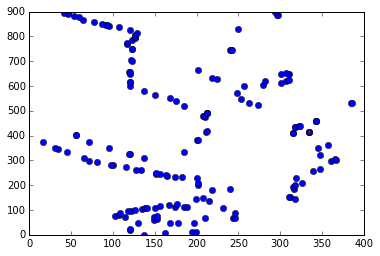

In [119]:
print data.shape
data = river.variables['rorunoff'][0,:]
i = np.arange(data.shape[1]) 
j = np.arange(data.shape[0])
i, j = np.meshgrid(i, j)
rivers = data[data > 0]
ip = i[data > 0]
jp = j[data > 0]

print rivers.shape
print ip.shape

plt.plot(ip,jp, 'o')
k = np.argmax(rivers)
plt.plot(ip[k], jp[k], 'r*')

12.1126656532 Main Fraser
2.44464802742 Squamish
2.43153619766 North Fraser
1.92052942514 Skagit
[ 1.63108504] Homathko
[ 1.34229779] SnohomishAllenQuilceda
1.31377834082 Toba
0.982839524746 Southgate
0.809399306774 Middle Fraser
0.805842578411 South Fraser
[ 0.71016031] Stillaguamish - total flux, only main arm mapped
[ 0.45240337] Powell
[ 0.43676871] Puyallup
[ 0.37520501] Salmon Sayward


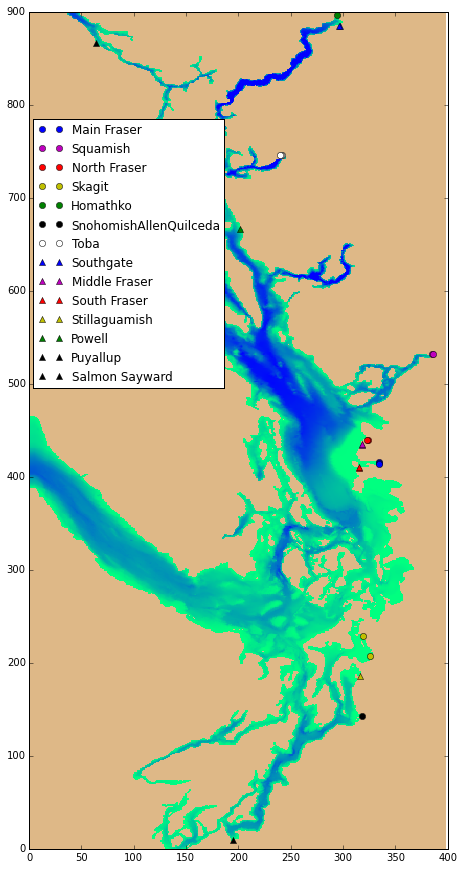

In [123]:
together = np.zeros((3,len(rivers)))
together[0] = ip
together[1] = jp
together[2] = rivers
rank_rivers = together[:,together[2,:].argsort()]

fig, ax = plt.subplots(1,1,figsize=(7.5,15))
imin = 0; imax = 898; jmin = 0; jmax = 398
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(depth[imin:imax,jmin:jmax], cmap=cmap)

ax.plot(rank_rivers[0,-3:], rank_rivers[1,-3:], 'bo', label="Main Fraser")
print np.sum(rank_rivers[2,-3:]), 'Main Fraser'

ax.plot(rank_rivers[0,-7:-5], rank_rivers[1,-7:-5], 'mo', label="Squamish")
print np.sum(rank_rivers[2,-7:-5]), 'Squamish'

ax.plot(rank_rivers[0,-9:-7], rank_rivers[1,-9:-7], 'ro', label="North Fraser")
print np.sum(rank_rivers[2,-9:-7]), 'North Fraser'

ax.plot(rank_rivers[0,-11:-9], rank_rivers[1,-11:-9], 'yo', label="Skagit")
print np.sum(rank_rivers[2,-11:-9]), 'Skagit'

ax.plot(rank_rivers[0,-4:-3], rank_rivers[1,-4:-3], 'go', label="Homathko")
print rank_rivers[2,-4:-3], 'Homathko'

ax.plot(rank_rivers[0,-5:-4], rank_rivers[1,-5:-4], 'ko', label="SnohomishAllenQuilceda")
print rank_rivers[2,-5:-4], 'SnohomishAllenQuilceda'

ax.plot(rank_rivers[0,-18:-15], rank_rivers[1,-18:-15], 'wo', label="Toba")
print np.sum(rank_rivers[2,-18:-15]), 'Toba'

ax.plot(rank_rivers[0,-14:-12], rank_rivers[1,-14:-12], 'b^', label="Southgate")
print np.sum(rank_rivers[2,-14:-12]), 'Southgate'

ax.plot(rank_rivers[0,-21:-19], rank_rivers[1,-21:-19], 'm^', label="Middle Fraser")
print np.sum(rank_rivers[2,-21:-19]), 'Middle Fraser'

ax.plot(rank_rivers[0,-23:-21], rank_rivers[1,-23:-21], 'r^', label="South Fraser")
print np.sum(rank_rivers[2,-23:-21]), 'South Fraser'

ax.plot(rank_rivers[0,-12:-11], rank_rivers[1,-12:-11], 'y^', label="Stillaguamish")
print rank_rivers[2,-12:-11]/0.7, 'Stillaguamish - total flux, only main arm mapped'

ax.plot(rank_rivers[0,-15:-14], rank_rivers[1,-15:-14], 'g^', label="Powell")
print rank_rivers[2,-15:-14], 'Powell'

ax.plot(rank_rivers[0,-19:-18], rank_rivers[1,-19:-18], 'k^', label="Puyallup")
print rank_rivers[2,-19:-18], 'Puyallup'

ax.plot(rank_rivers[0,-24:-23], rank_rivers[1,-24:-23], 'k^', label="Salmon Sayward")
print rank_rivers[2,-24:-23], 'Salmon Sayward'

#print (rank_rivers[:,-25:-23])

plt.legend(loc=(0.01,0.55))

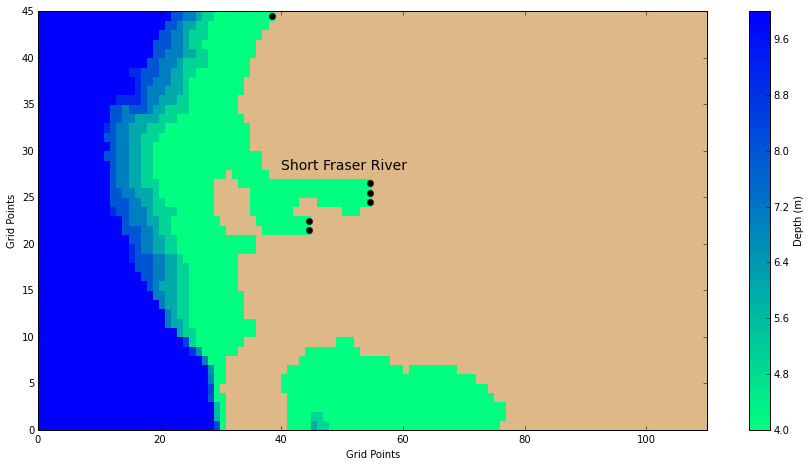

In [47]:
ik = 425; jk = 302; d = 6
fig, ax = plt.subplots(1,1,figsize=(15,7.5))
imin = 390; imax = 435; jmin = 280; jmax = 398
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(depth[imin:imax,jmin:jmax], vmax = 10., cmap=cmap)
ax.set_xlim((0,110))
ax.set_xlabel('Grid Points')
ax.set_ylabel('Grid Points')
ax.text(40, 28, "Short Fraser River", fontsize=14)
cbar=fig.colorbar(mesh)
cbar.set_label('Depth (m)')
ax.plot(np.array((324,324,334,334,334,318))-jmin+0.5,np.array((411,412,414,415,416,434))-imin+0.5,'ko');